In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/water.csv')
data.head(2)

,Unnamed: 0,Canal_id,year,Canal_name,Sample_water_point,TEMP. (oC),pH,DO (mg/l),H2S (mg/l),BOD (mg/l),COD (mg/l),SS (mg/l),TKN (mg/l),NH3N (mg/l),NO2 (mg/l),NO3 (mg/l),T-P (mg/l),T.Coliform (col/100ml),Sample_water_point (EN),Canal_name (EN)
0,1,12.0,2561,คลองคูเมืองเดิม,ปตร.ราชินี,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.0,2.2,0.1,930000.0,Her Royal Highness Princess Maha Chakri Sirind...,Khlong Khu Mueang Derm
1,2,13.0,2561,คลองคูเมืองเดิม,หน้ากรมที่ดิน,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.0,2.2,0.1,11000000.0,Department of Lands page,Khlong Khu Mueang Derm


In [3]:
data.shape

(917, 20)

In [4]:
data.columns

Index(['Unnamed: 0', 'Canal_id', 'year', 'Canal_name', 'Sample_water_point',
       'TEMP. (oC)', '  pH', 'DO (mg/l)', 'H2S (mg/l)', 'BOD (mg/l)',
       'COD (mg/l)', 'SS (mg/l)', 'TKN (mg/l)', 'NH3N (mg/l)', 'NO2 (mg/l)',
       'NO3 (mg/l)', 'T-P (mg/l)', 'T.Coliform (col/100ml)',
       'Sample_water_point (EN)', 'Canal_name (EN)'],
      dtype='object')

In [5]:
cols = {
    'Unnamed: 0': 'Index',
    'Canal_id': 'CID',
    'year': 'Year',
    'Canal_name': 'CN',
    'Sample_water_point': 'WSP',
    'TEMP. (oC)': 'Temp',
    '  pH': 'pH',
    'DO (mg/l)': 'DO',
    'H2S (mg/l)': 'HS',
    'BOD (mg/l)': 'BO',
    'COD (mg/l)': 'CO',
    'SS (mg/l)': 'SS',
    'TKN (mg/l)': 'TKN',
    'NH3N (mg/l)': 'AN',
    'NO2 (mg/l)': 'NO2N',
    'NO3 (mg/l)': 'NO3N',
    'T-P (mg/l)': 'TP',
    'T.Coliform (col/100ml)': 'TC',
    'Sample_water_point (EN)': 'WSPEN',
    'Canal_name (EN)': 'CNEN'
}


data = data.rename(columns=cols)
data.columns

Index(['Index', 'CID', 'Year', 'CN', 'WSP', 'Temp', 'pH', 'DO', 'HS', 'BO',
       'CO', 'SS', 'TKN', 'AN', 'NO2N', 'NO3N', 'TP', 'TC', 'WSPEN', 'CNEN'],
      dtype='object')

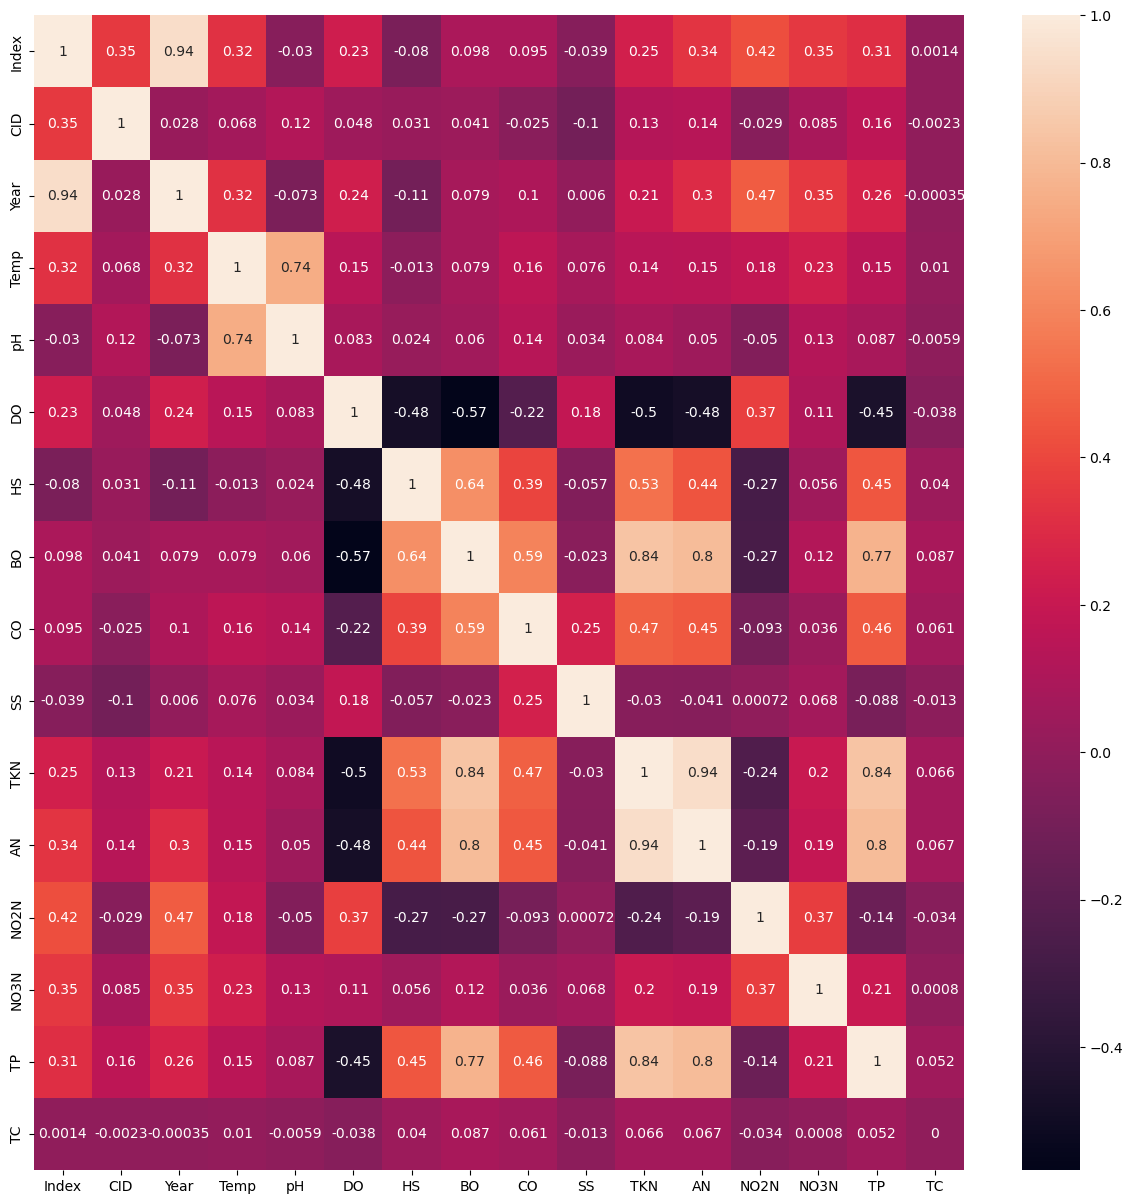

In [11]:
plt.figure(figsize=(15, 15))
sns.heatmap(data=data.corr(numeric_only=True), annot=True)
plt.show()

In [12]:
data.dtypes

Index      int64
CID      float64
Year       int64
CN        object
WSP       object
Temp     float64
pH       float64
DO       float64
HS       float64
BO       float64
CO       float64
SS       float64
TKN      float64
AN       float64
NO2N     float64
NO3N     float64
TP       float64
TC       float64
WSPEN     object
CNEN      object
dtype: object

In [13]:
data.drop(columns=['Index', 'CN', 'WSP'], inplace=True)

In [14]:
data.dtypes

CID      float64
Year       int64
Temp     float64
pH       float64
DO       float64
HS       float64
BO       float64
CO       float64
SS       float64
TKN      float64
AN       float64
NO2N     float64
NO3N     float64
TP       float64
TC       float64
WSPEN     object
CNEN      object
dtype: object

In [15]:
data.isna().sum()

CID      0
Year     0
Temp     0
pH       0
DO       0
HS       0
BO       0
CO       0
SS       0
TKN      0
AN       0
NO2N     0
NO3N     0
TP       0
TC       0
WSPEN    0
CNEN     0
dtype: int64

In [29]:
def determine_potability(row):
    # Adjusted water quality thresholds for canal water potability
    if (row['pH'] >= 6.7 and row['pH'] <= 7.3):
    #    (row['DO'] >= 3) and \
    #    (row['BO'] <= 10) and \
    #    (row['CO'] <= 50) and \
    #    (row['SS'] <= 50) and \
    #    (row['TKN'] <= 5) and \
    #    (row['AN'] <= 5) and \
    #    (row['NO3N'] <= 20) and \
    #    (row['HS'] <= 1) and \
    #    (row['TC'] == 0):  # No total coliforms
        return 1  # Potable water (for canal water use case)
    else:
        return 0  # Non-potable water (for canal water use case)

# Apply the revised function to the DataFrame and create a new 'Water_Potability' column
data['Water_Potability'] = data.apply(determine_potability, axis=1)

# Display the DataFrame with the new 'Water_Potability' column
print(data[['CID', 'Year', 'Water_Potability']].head())

    CID  Year  Water_Potability
0  12.0  2561                 0
1  13.0  2561                 0
2  14.0  2561                 0
3  15.0  2561                 0
4  16.0  2561                 1


In [30]:
data.head()

,CID,Year,Temp,pH,DO,HS,BO,CO,SS,TKN,AN,NO2N,NO3N,TP,TC,WSPEN,CNEN,Water_Potability
0,12.0,2561,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.00,2.2,0.1,930000.0,Her Royal Highness Princess Maha Chakri Sirind...,Khlong Khu Mueang Derm,0
1,13.0,2561,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.00,2.2,0.1,11000000.0,Department of Lands page,Khlong Khu Mueang Derm,0
2,14.0,2561,25.0,8.0,1.7,0.0,5.0,56.0,24.0,2.2,0.6,0.34,2.3,0.2,4600000.0,"Mother Earth Muay Hair Monument, Sanam Luang",Khlong Khu Mueang Derm,0
3,15.0,2561,25.0,7.9,3.0,0.0,4.0,47.0,17.0,2.8,0.6,0.00,1.9,0.1,30000.0,Phra Pinklao Police Station,Khlong Khu Mueang Derm,0
4,16.0,2561,25.0,7.3,1.4,0.0,6.0,36.0,7.0,2.8,0.6,0.14,1.1,0.3,1500000.0,Bridge in front of the Ministry of Interior,Khlong Khu Mueang Derm,1


In [31]:
data.Water_Potability.value_counts()

Water_Potability
1    637
0    280
Name: count, dtype: int64

In [32]:
data.describe()

,CID,Year,Temp,pH,DO,HS,BO,CO,SS,TKN,AN,NO2N,NO3N,TP,TC,Water_Potability
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,9.170000e+02,917.000000
mean,729.759324,2562.008724,28.694329,7.242007,1.667045,0.179804,12.802672,64.103762,21.953719,7.999945,4.358997,0.146205,2.123228,0.947895,2.181025e+118,0.694656
std,553.978537,0.820008,1.845115,0.462830,1.282984,0.389665,9.397183,22.350496,17.194847,5.133194,3.600244,0.131068,0.692240,0.519764,6.604582e+119,0.460804
min,12.000000,2561.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,221.000000,2561.000000,28.500000,7.130000,0.510000,0.000000,6.250000,51.000000,12.000000,4.100000,1.500000,0.020000,1.700000,0.520000,1.220000e+08,0.000000
50%,591.000000,2562.000000,29.000000,7.290000,1.600000,0.000000,9.800000,60.500000,17.000000,7.100000,3.460000,0.110000,2.000000,0.900000,1.530000e+10,1.000000
75%,1191.000000,2563.000000,29.300000,7.400000,2.600000,0.200000,15.830000,72.100000,26.000000,10.800000,6.100000,0.210000,2.500000,1.250000,2.100000e+12,1.000000
max,1822.000000,2563.000000,31.900000,9.100000,9.700000,5.000000,84.500000,202.000000,148.300000,39.800000,23.330000,0.730000,8.600000,3.530000,2.000000e+121,1.000000


In [34]:
import pandas as pd

# Define the function to calculate the Water Quality Index (WQI)
def calculate_wqi(row):
    # Set the min and max values for each parameter (these values may vary based on local standards)
    # Example min-max values for the parameters (adjust based on standards)
    min_values = {
        'pH': 6.0,  # Min acceptable pH
        'DO': 3,  # Min acceptable DO (mg/l)
        'BO': 0,  # Max acceptable BOD (mg/l)
        'CO': 0,  # Max acceptable COD (mg/l)
        'SS': 0,  # Max acceptable SS (mg/l)
        'TKN': 0,  # Max acceptable TKN (mg/l)
        'AN': 0,  # Max acceptable Ammonia Nitrogen (mg/l)
        'NO3N': 0,  # Max acceptable Nitrate Nitrogen (mg/l)
        'HS': 0,  # Max acceptable H2S (mg/l)
        # 'TC': 0  # Max acceptable Total Coliform (col/100ml)
    }

    max_values = {
        'pH': 9.0,  # Max acceptable pH
        'DO': 10,  # Max acceptable DO (mg/l)
        'BO': 5,  # Max acceptable BOD (mg/l)
        'CO': 20,  # Max acceptable COD (mg/l)
        'SS': 10,  # Max acceptable SS (mg/l)
        'TKN': 5,  # Max acceptable TKN (mg/l)
        'AN': 1,  # Max acceptable Ammonia Nitrogen (mg/l)
        'NO3N': 10,  # Max acceptable Nitrate Nitrogen (mg/l)
        'HS': 1,  # Max acceptable H2S (mg/l)
        # 'TC': 0  # Max acceptable Total Coliform (col/100ml)
    }

    # Define the weight for each parameter based on its importance (these weights can vary)
    weights = {
        'pH': 0.1,
        'DO': 0.15,
        'BO': 0.15,
        'CO': 0.1,
        'SS': 0.1,
        'TKN': 0.1,
        'AN': 0.1,
        'NO3N': 0.1,
        'HS': 0.05,
        # 'TC': 0.05
    }

    # Initialize WQI
    wqi = 0

    # Calculate normalized values and weighted scores for each parameter
    for param in min_values:
        # Normalize the value
        norm_value = (row[param] - min_values[param]) / (max_values[param] - min_values[param]) * 100
        # Apply weight and calculate the weighted score
        weighted_score = norm_value * weights[param]
        wqi += weighted_score

    return wqi

# Assuming `data` is your DataFrame containing the water quality data and renamed columns
data['WQI'] = data.apply(calculate_wqi, axis=1)

# Display the DataFrame with the WQI value
print(data[['CID', 'Year', 'WQI']].head())


    CID  Year        WQI
0  12.0  2561  83.623810
1  13.0  2561  83.814286
2  14.0  2561  83.580952
3  15.0  2561  72.333333
4  16.0  2561  56.604762


In [35]:
data.head()

,CID,Year,Temp,pH,DO,HS,BO,CO,SS,TKN,AN,NO2N,NO3N,TP,TC,WSPEN,CNEN,Water_Potability,WQI
0,12.0,2561,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.00,2.2,0.1,930000.0,Her Royal Highness Princess Maha Chakri Sirind...,Khlong Khu Mueang Derm,0,83.623810
1,13.0,2561,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.00,2.2,0.1,11000000.0,Department of Lands page,Khlong Khu Mueang Derm,0,83.814286
2,14.0,2561,25.0,8.0,1.7,0.0,5.0,56.0,24.0,2.2,0.6,0.34,2.3,0.2,4600000.0,"Mother Earth Muay Hair Monument, Sanam Luang",Khlong Khu Mueang Derm,0,83.580952
3,15.0,2561,25.0,7.9,3.0,0.0,4.0,47.0,17.0,2.8,0.6,0.00,1.9,0.1,30000.0,Phra Pinklao Police Station,Khlong Khu Mueang Derm,0,72.333333
4,16.0,2561,25.0,7.3,1.4,0.0,6.0,36.0,7.0,2.8,0.6,0.14,1.1,0.3,1500000.0,Bridge in front of the Ministry of Interior,Khlong Khu Mueang Derm,1,56.604762


In [ ]:
# From water quality index (WQI) calculate potability and classify as 1 (safe), 0 (potentially unsafe), -1(unsafe)
def calc_water_potability(m):
    if m > 75: 
        return 1
    
    if m > 50:
        return 0
    
    return -1


data['target'] = data['WQI'].apply(calc_water_potability)
data['target']

0      1
1      1
2      1
3      0
4      0
      ..
912    0
913    1
914    1
915    1
916    1
Name: target, Length: 917, dtype: int64

In [37]:
data.head()

,CID,Year,Temp,pH,DO,HS,BO,CO,SS,TKN,AN,NO2N,NO3N,TP,TC,WSPEN,CNEN,Water_Potability,WQI,target
0,12.0,2561,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.00,2.2,0.1,930000.0,Her Royal Highness Princess Maha Chakri Sirind...,Khlong Khu Mueang Derm,0,83.623810,1
1,13.0,2561,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.00,2.2,0.1,11000000.0,Department of Lands page,Khlong Khu Mueang Derm,0,83.814286,1
2,14.0,2561,25.0,8.0,1.7,0.0,5.0,56.0,24.0,2.2,0.6,0.34,2.3,0.2,4600000.0,"Mother Earth Muay Hair Monument, Sanam Luang",Khlong Khu Mueang Derm,0,83.580952,1
3,15.0,2561,25.0,7.9,3.0,0.0,4.0,47.0,17.0,2.8,0.6,0.00,1.9,0.1,30000.0,Phra Pinklao Police Station,Khlong Khu Mueang Derm,0,72.333333,0
4,16.0,2561,25.0,7.3,1.4,0.0,6.0,36.0,7.0,2.8,0.6,0.14,1.1,0.3,1500000.0,Bridge in front of the Ministry of Interior,Khlong Khu Mueang Derm,1,56.604762,0


In [38]:
data['target'].value_counts()

target
 1    851
 0     61
-1      5
Name: count, dtype: int64

In [39]:
data.columns

Index(['CID', 'Year', 'Temp', 'pH', 'DO', 'HS', 'BO', 'CO', 'SS', 'TKN', 'AN',
       'NO2N', 'NO3N', 'TP', 'TC', 'WSPEN', 'CNEN', 'Water_Potability', 'WQI',
       'target'],
      dtype='object')

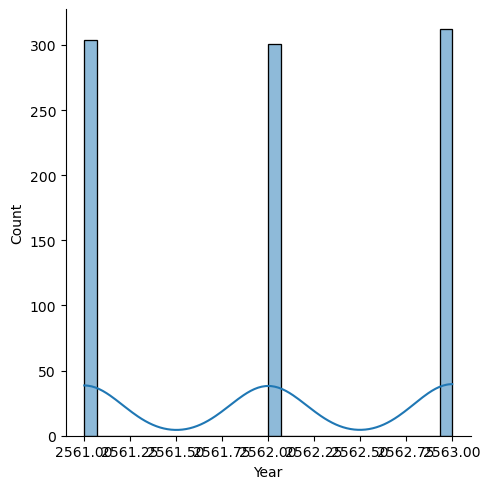

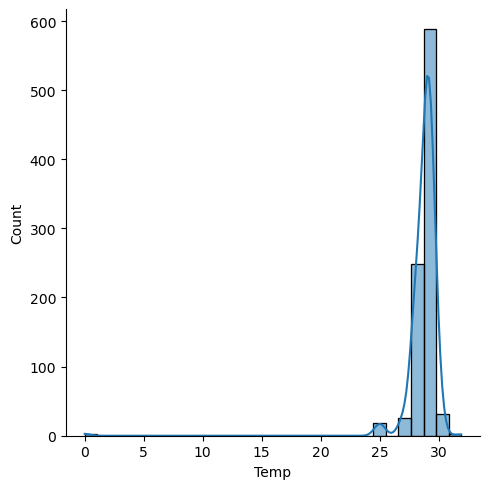

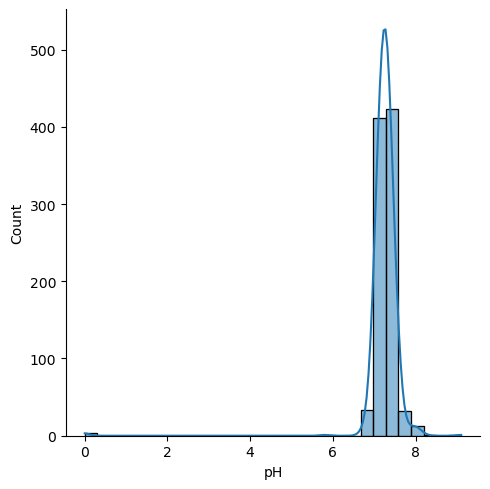

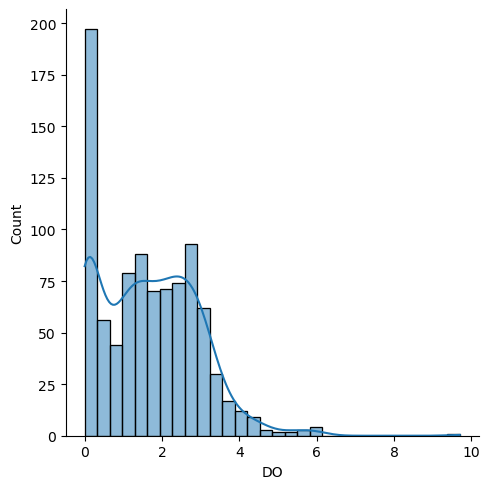

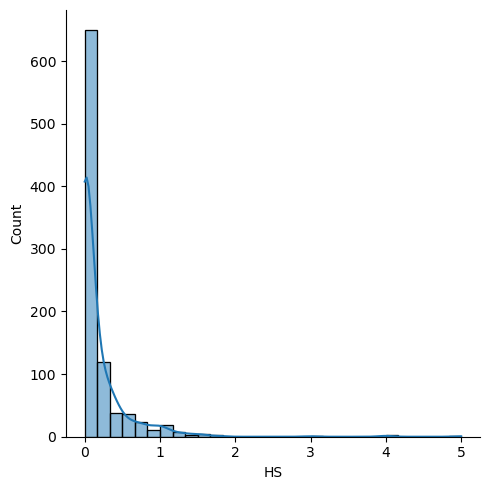

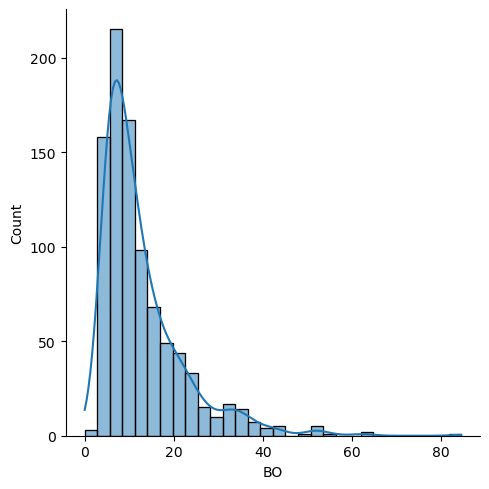

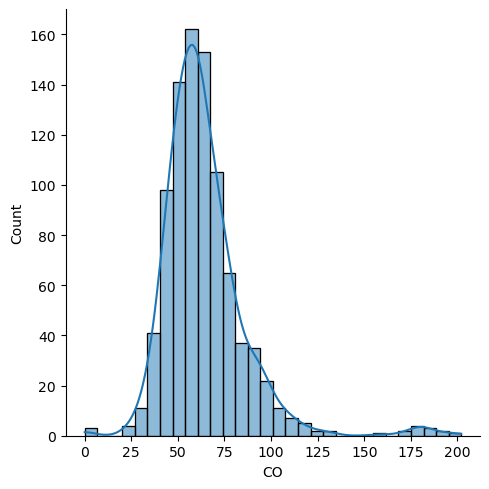

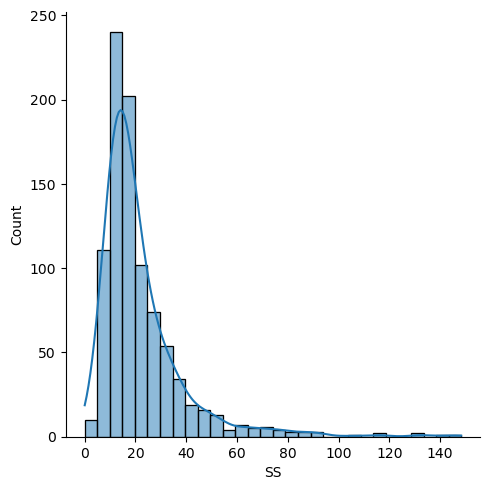

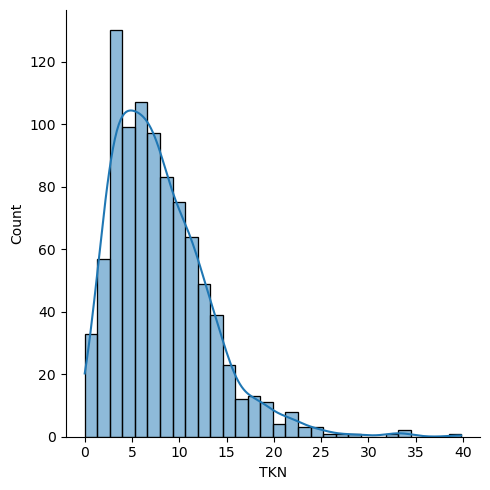

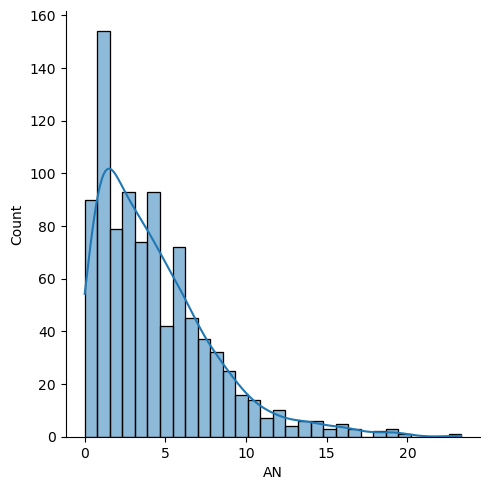

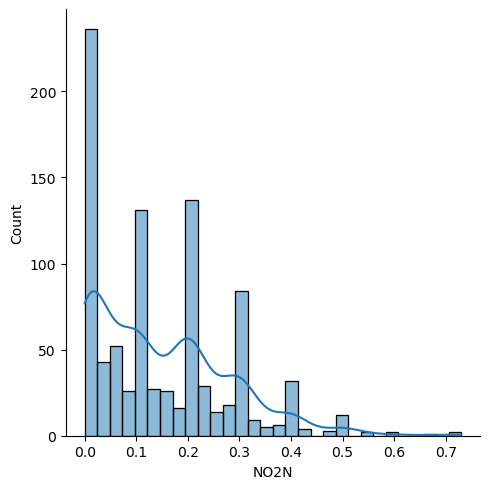

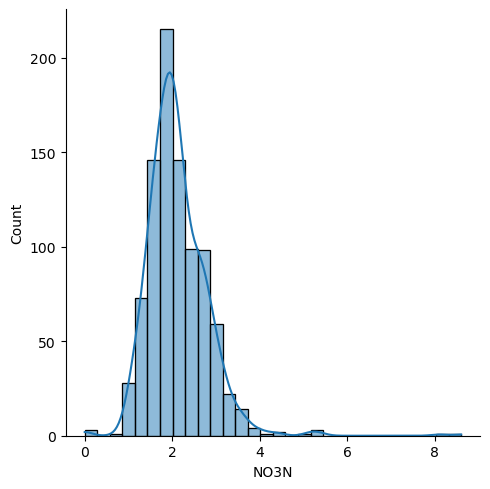

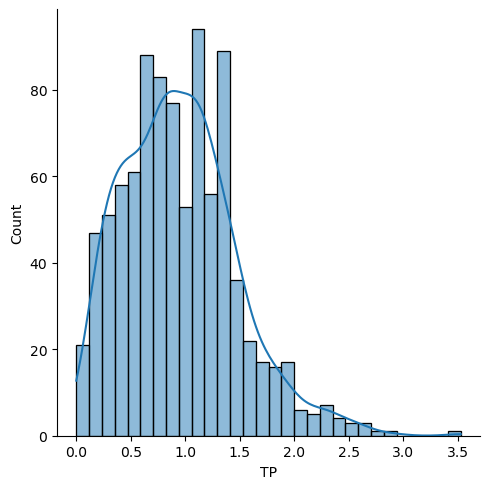

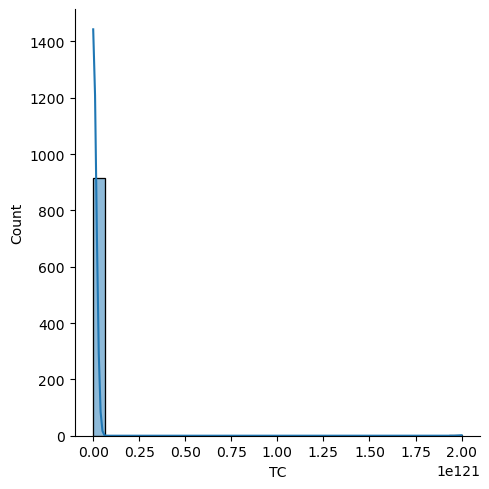

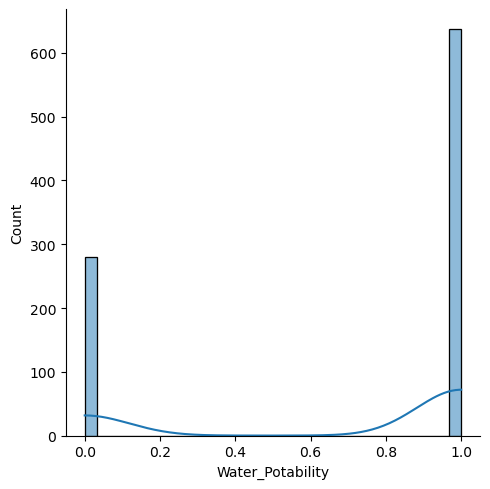

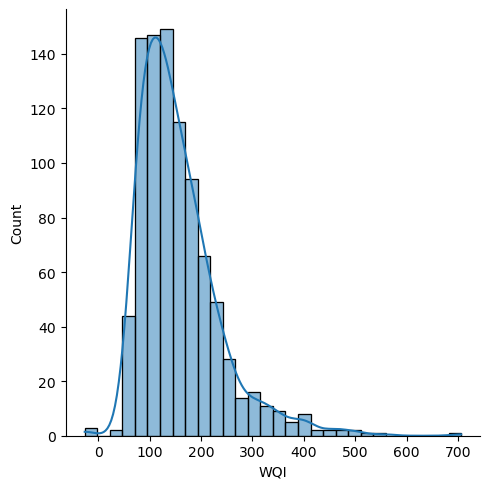

In [44]:
columns = ['Year', 'Temp', 'pH', 'DO', 'HS', 'BO', 'CO', 'SS', 'TKN', 'AN',
       'NO2N', 'NO3N', 'TP', 'TC','Water_Potability', 'WQI']

for col in columns:
    if data[col].dtype != "object":
        sns.displot(data[col], bins=30, kde=True)

In [46]:
data['WQI'].unique()

array([ 83.62380952,  83.81428571,  83.58095238,  72.33333333,
        56.6047619 , 102.93809524, 153.6047619 , 110.24761905,
       134.5952381 , 103.71428571, 115.14285714, 312.93809524,
       149.53809524, 123.83809524, 146.98095238,  95.85714286,
       100.23809524,  77.68095238,  94.43809524,  85.28095238,
        73.68095238,  61.1       ,  60.65238095,  63.32380952,
        62.56190476, 124.73333333, 172.94761905, 143.93809524,
       122.46666667, 122.76666667,  84.8047619 ,  87.67619048,
        82.29047619,  97.98095238, 113.1047619 , 136.46666667,
       268.03809524, 103.33809524, 106.33809524, 242.23809524,
       162.17142857, 129.93809524,  93.11428571, 128.33809524,
       124.40952381,  68.96666667,  96.62380952, 102.43809524,
        61.11904762, 246.7047619 , 289.73809524,  59.76190476,
        78.13809524,  80.1952381 , 251.1047619 , 257.67142857,
        98.2047619 , 281.3047619 , 255.3047619 , 231.33809524,
       132.13809524, 187.73809524, 172.9047619 , 169.83

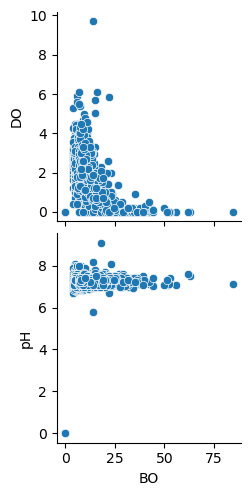

In [51]:
sns.pairplot(
    data=data,
    x_vars=["BO"],
    y_vars=["DO", "pH"],
)